In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
iris = datasets.load_iris()
num_sample, num_feature = iris.data.shape

print('Number of samples:\t{}'.format(num_sample)) # \t : 한 tab만큼의 공간을 두고, num_sample 변수를 가지고 온다.
print('Number of features:\t{}'.format(num_feature))

print('Feature names:\n', iris.feature_names)

Number of samples:	150
Number of features:	4
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X = iris.data
y = iris.target

In [5]:
X[:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
print('label count of y:', np.bincount(y)) # bincount : 클래스 숫자를 세어주는 함수
print('label count of y_train:', np.bincount(y_train))
print('label count of y_test:', np.bincount(y_test))

label count of y: [50 50 50]
label count of y_train: [35 35 35]
label count of y_test: [15 15 15]


In [22]:
clf = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=4, 
                                    random_state=1) # clf ; classifier. 기준은 gini 계수로(entropy라고 입력하면 cross-entropy 사용할 수 있다), tree depth는 4로 지정

clf.fit(X_train, y_train) # fit

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

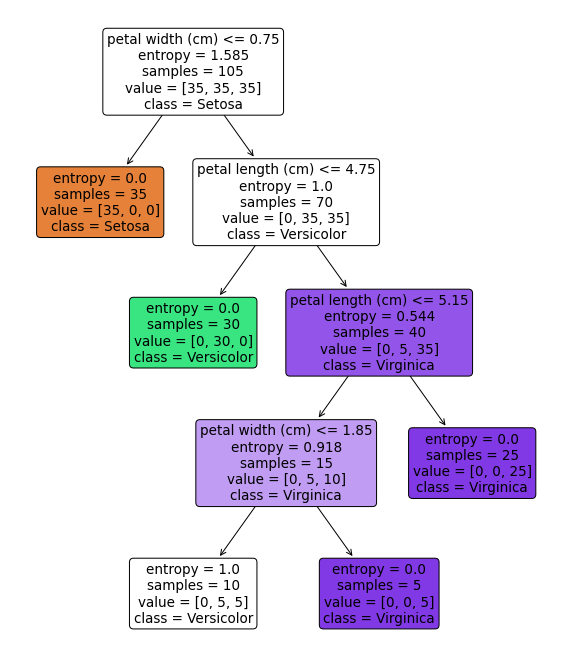

In [23]:
plt.figure(figsize=(10,12))
tree.plot_tree(clf,
               impurity=True,
               filled=True, 
               rounded=True,
               class_names=['Setosa', 'Versicolor', 'Virginica'],
               feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show() # 2개의 변수만이 많이 사용되었는데, 이 2개가 중요한 변수라고 판단할 수 있다.

In [24]:
predict1 = clf.predict(X_test)
print(accuracy_score(y_test,predict1))

0.9333333333333333


In [13]:
fn = iris.feature_names
fi = np.round(clf.feature_importances_, 2)

In [14]:
print('features:\n\t{}'.format(fn))
print('feature importance:\n\t{}'.format(fi))

features:
	['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature importance:
	[0.   0.   0.36 0.64]


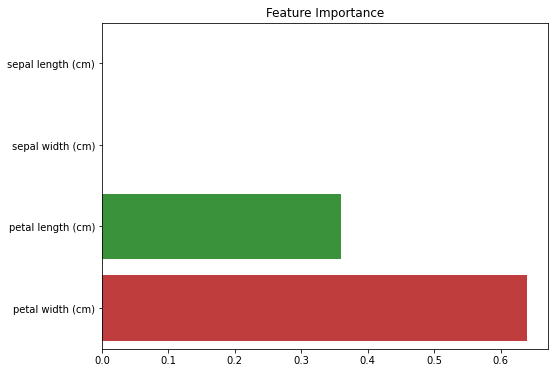

In [15]:
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x = fi, y = fn)
plt.show() # petal.length와 petal.width가 중요하고, petal.width의 중요도가 조금 더 높게 나타난다.